In [35]:
#libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from yfinance import download

In [36]:
# names of stocks
stocks = ["AAPL", "MSFT", "GOOGL", "AMZN"]

In [37]:
# **Download Data from Yahoo Finance**
data = download(tickers=stocks,start="2024-01-01",end="2025-01-01")

C:\Users\v.rajkumar\AppData\Local\Temp\ipykernel_14904\468460142.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = download(tickers=stocks,start="2024-01-01",end="2025-01-01")
[*********************100%***********************]  4 of 4 completed


In [38]:
close_price = data["Close"]

In [39]:
close_price


Ticker,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2024-01-02,184.081512,149.929993,137.223557,366.105530
2024-01-03,182.703186,148.470001,137.968414,365.839020
2024-01-04,180.382828,144.570007,135.455750,363.213196
2024-01-05,179.658936,145.240005,134.800262,363.025665
2024-01-08,184.002167,149.100006,137.888962,369.876495
...,...,...,...,...
2024-12-24,257.286682,229.050003,195.472717,436.929108
2024-12-26,258.103729,227.050003,194.964386,435.715790
2024-12-27,254.685883,223.750000,192.133591,428.177216


In [40]:
daily_returns = close_price.pct_change().dropna()

In [41]:
daily_returns

Ticker,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2024-01-03,-0.007488,-0.009738,0.005428,-0.000728
2024-01-04,-0.012700,-0.026268,-0.018212,-0.007178
2024-01-05,-0.004013,0.004634,-0.004839,-0.000516
2024-01-08,0.024175,0.026577,0.022913,0.018871
2024-01-09,-0.002263,0.015225,0.015197,0.002936
...,...,...,...,...
2024-12-24,0.011478,0.017729,0.007604,0.009374
2024-12-26,0.003176,-0.008732,-0.002601,-0.002777
2024-12-27,-0.013242,-0.014534,-0.014520,-0.017302


In [42]:
weights = np.array([0.30,0.40,0.2,0.1])

In [43]:
expected_return = np.sum(daily_returns.mean() * weights) * 252
expected_return

np.float64(0.3553105980244354)

In [44]:
portpolio_validity  = np.sqrt(np.dot(weights.T, np.dot(daily_returns.cov() * 252, weights)))
portpolio_validity

np.float64(0.20242526488135204)

In [46]:
print(f"Expected Annual Return: {expected_return*100:.2f}%")
print(f"Portfolio Volatility: {portpolio_validity*100:.2f}%")

Expected Annual Return: 35.53%
Portfolio Volatility: 20.24%


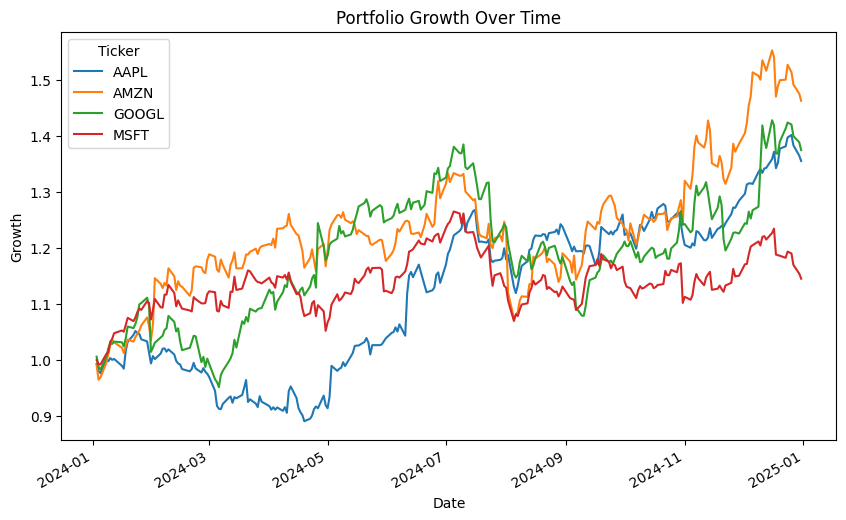

In [ ]:
portpoilio_growth = (1 + daily_returns).cumprod()
portpoilio_growth.plot(figsize=(10,6))
plt.title("Portfolio Growth Over Time")
plt.xlabel("Date")
plt.ylabel("Growth")
plt.legend(stocks)
plt.show()